In [1]:
import os
os.chdir("/import/home2/yhchenmath/Code/project5472/")
from data.stsc_dataset import STSCDataset
from options import Options, HParams
from utils.experiman import ExperiMan

# Prepare dataset
manager = ExperiMan(name='default')
parser = manager.get_basic_arg_parser()
parser.set_defaults(run_name='TEMP')
parser.set_defaults(gpu='2')
opt = Options(parser).load_json("./configs/dlpfc.json")
manager.setup(opt)
opt = HParams(**vars(opt))

dataset = STSCDataset(opt, manager)

======> UID of this run: 231130-100740-lbxdSu
run_number : 0
Directory /import/home2/yhchenmath/Log/stitch3D/UNDEFINED/TEMP/0 exists, please choose an option:
Old files deleted.
======> Directory for this run: /import/home2/yhchenmath/Log/stitch3D/UNDEFINED/TEMP/0
2023-11-30 10:07:42,012 INFO Opts: Namespace(code_dir='./', data_dir='/import/home2/yhchenmath/Dataset/stitch3D', dataset={'preprocess_pkl_loc': '/import/home2/yhchenmath/Dataset/stitch3D/DLPFC/process/', 'align': {'plot': False}, 'preprocess': {'sample_col': 'group', 'n_hvg_group': 500}}, exp_name='UNDEFINED', gpu='2', log_dir='/import/home2/yhchenmath/Log/stitch3D', model={'distribution': 'Poisson', 'coef_fe': 0.1, 'arch': {'hidden_dims': [512, 128], 'n_heads': 1, 'slice_emb_dim': 16}}, option_for_existing_dir=None, run_name='TEMP', run_number='0', seed=0, training={'training_steps': 30000, 'lr': 0.002, 'log_every': 1000, 'save_every': 5000}, uid='231130-100740-lbxdSu')
2023-11-30 10:07:43,317 INFO ======> Using the Iterati

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical
... storing 'condition' as categorical
... storing 'celltype' as categorical


2023-11-30 10:07:59,491 INFO ======> 4558 highly variable genes selected.
2023-11-30 10:07:59,499 INFO ======> Calculate basis for deconvolution...


Trying to set attribute `.obs` of view, copying.


2023-11-30 10:08:00,223 INFO ======> 1 batches are used for computing the basis vector of cell type <Astros_1>.
2023-11-30 10:08:00,800 INFO ======> 17 batches are used for computing the basis vector of cell type <Astros_2>.
2023-11-30 10:08:01,304 INFO ======> 14 batches are used for computing the basis vector of cell type <Astros_3>.
2023-11-30 10:08:01,857 INFO ======> 17 batches are used for computing the basis vector of cell type <Endo>.
2023-11-30 10:08:02,528 INFO ======> 17 batches are used for computing the basis vector of cell type <Ex_10_L2_4>.
2023-11-30 10:08:03,041 INFO ======> 15 batches are used for computing the basis vector of cell type <Ex_1_L5_6>.
2023-11-30 10:08:03,581 INFO ======> 15 batches are used for computing the basis vector of cell type <Ex_2_L5>.
2023-11-30 10:08:04,192 INFO ======> 17 batches are used for computing the basis vector of cell type <Ex_3_L4_5>.
2023-11-30 10:08:04,702 INFO ======> 14 batches are used for computing the basis vector of cell ty

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


2023-11-30 10:10:28,660 INFO ======> Radius for graph connection is 150.7000.
2023-11-30 10:10:32,254 INFO ======> 9.8415 neighbors per cell on average.


In [3]:
import sys
import pandas as pd
import numpy as np
# Set current working directory


# Reset working directory
data_dir = "/import/home2/yhchenmath/Log/stitch3D/UNDEFINED/dlpfc/0/results"

In [4]:
df_3d_coor = pd.read_csv(data_dir + "/3D_coordinates.csv", index_col=0)

## Visualize UMAP of representations

In [5]:
import pandas as pd
import numpy as np
import scanpy as sc
sc.settings.verbosity = 0
import anndata as ad
import os
import sys

latent = pd.read_csv(data_dir+'/representation.csv', index_col=0)

In [6]:
latent

0         1         2         3         4  \
AAACAAGTATCTCCCA-1-slice0 -2.469387 -0.521885  0.679638 -0.233936  2.388646   
AAACAATCTACTAGCA-1-slice0 -0.264615 -0.999226 -0.232247 -0.358971  2.676573   
AAACACCAATAACTGC-1-slice0 -1.128713 -2.343203 -1.522962 -0.384340 -4.552838   
AAACAGAGCGACTCCT-1-slice0 -2.583105 -1.260491  1.148662  1.231359  0.347713   
AAACAGCTTTCAGAAG-1-slice0 -2.018361 -0.867797  0.027812  2.193686 -2.474436   
...                             ...       ...       ...       ...       ...   
TTGTTGTGTGTCAAGA-1-slice3 -1.300437  1.167842 -2.111183  0.305593 -2.722655   
TTGTTTCACATCCAGG-1-slice3 -2.634545 -1.265529 -2.972022 -0.914952 -2.943436   
TTGTTTCATTAGTCTA-1-slice3 -0.737648 -1.831784 -0.651024 -0.989966 -1.133412   
TTGTTTCCATACAACT-1-slice3 -0.891752 -0.646768 -0.615202 -1.522529  0.475039   
TTGTTTGTGTAAATTC-1-slice3 -5.186835 -0.883925 -2.164007 -0.747039  2.354137   

                                  5         6         7         8         9  \
AAACAAGTATCTCCCA-1-slice0  0.892147  1.056681 -0.060381 -4.506224  0.412400   
AAACAATCTACTAGCA-1-slice0 -1.701751  1.467839 -0.969585 -2.573938 -2.722937   
AAACACCAATAACTGC-1-slice0 -5.655943 -1.375339 -6.031891  0.543614 -1.395430   
AAACAGAGCGACTCCT-1-slice0  2.610343  0.203546  0.583640 -6.904485 -0.536848   
AAACAGCTTTCAGAAG-1-slice0 -2.718699 -2.175361 -0.060813 -3.800225  1.432569   
...                             ...       ...       ...       ...       ...   
TTGTTGTGTGTCAAGA-1-slice3 -1.597605  0.206281 -0.208225 -4.424061  2.215000   
TTGTTTCACATCCAGG-1-slice3 -5.254650 -1.048709 -4.668693 -0.822784 -0.484454   
TTGTTTCATTAGTCTA-1-slice3 -5.747413  0.818018 -4.973130 -1.426333 -1.701053   
TTGTTTCCATACAACT-1-slice3 -1.406976 -2.232304 -1.801604 -3.665811  0.124035   
TTGTTTGTGTAAATTC-1-slice3  1.341701  1.002697  1.798170 -6.017235 -1.037422   

                           ...       118       119       120       121  \
AAACAAGTATCTCCCA-1-slice0  ... -1.795121 -5.973170 -2.115930 -0.521508   
AAACAATCTACTAGCA-1-slice0  ... -2.585962 -6.145734 -1.120722 -0.704005   
AAACACCAATAACTGC-1-slice0  ... -3.025777  3.537945  5.928215  1.314475   
AAACAGAGCGACTCCT-1-slice0  ... -2.099320 -8.295151 -7.551805 -1.944490   
AAACAGCTTTCAGAAG-1-slice0  ...  0.600101  0.169809 -3.041804  0.653654   
...                        ...       ...       ...       ...       ...   
TTGTTGTGTGTCAAGA-1-slice3  ... -0.216030  1.270622 -0.618641 -0.491367   
TTGTTTCACATCCAGG-1-slice3  ... -2.997810  5.664562  1.735210 -0.453498   
TTGTTTCATTAGTCTA-1-slice3  ... -3.757985  5.633736  0.597254  0.573433   
TTGTTTCCATACAACT-1-slice3  ... -2.023560  0.804122  0.865963  1.027010   
TTGTTTGTGTAAATTC-1-slice3  ... -3.852707 -2.095358 -3.428568 -0.453930   

                                122       123       124       125       126  \
AAACAAGTATCTCCCA-1-slice0  0.470584  0.477008  3.626759  0.061461  0.517720   
AAACAATCTACTAGCA-1-slice0 -0.958357  0.383216  3.854871 -4.129216 -2.186746   
AAACACCAATAACTGC-1-slice0 -0.921917  3.214741 -1.455571 -2.773693 -1.072995   
AAACAGAGCGACTCCT-1-slice0  0.367436  0.449650  6.331090  0.035249  2.163303   
AAACAGCTTTCAGAAG-1-slice0 -0.727661 -1.620658 -0.152405  0.101362 -0.627658   
...                             ...       ...       ...       ...       ...   
TTGTTGTGTGTCAAGA-1-slice3  1.250582 -2.000320  1.241725 -0.107108 -1.373280   
TTGTTTCACATCCAGG-1-slice3  0.002609  2.524027  0.869835 -1.898488 -1.178364   
TTGTTTCATTAGTCTA-1-slice3  0.328970  0.475646 -1.719122 -3.339221 -1.783096   
TTGTTTCCATACAACT-1-slice3 -1.122180  0.250204 -0.026627 -2.926809 -2.777437   
TTGTTTGTGTAAATTC-1-slice3  0.735411  1.566543  4.752164 -4.872462 -0.269102   

                                127  
AAACAAGTATCTCCCA-1-slice0  2.068137  
AAACAATCTACTAGCA-1-slice0  3.728193  
AAACACCAATAACTGC-1-slice0 -3.228871  
AAACAGAGCGACTCCT-1-slice0  3.146005  
AAACAGCTTTCAGAAG-1-slice0 -3.666648  
...                             ...  
TTGTTGTGTGTCAAGA-1-slice3 -2.279

In [7]:
adata_all = dataset.adata_st.copy()[latent.index]

In [8]:
adata_all.obs

in_tissue  array_row  array_col  \
AAACAAGTATCTCCCA-1-slice0          1         50        102   
AAACAATCTACTAGCA-1-slice0          1          3         43   
AAACACCAATAACTGC-1-slice0          1         59         19   
AAACAGAGCGACTCCT-1-slice0          1         14         94   
AAACAGCTTTCAGAAG-1-slice0          1         43          9   
...                              ...        ...        ...   
TTGTTGTGTGTCAAGA-1-slice3          1         31         77   
TTGTTTCACATCCAGG-1-slice3          1         58         42   
TTGTTTCATTAGTCTA-1-slice3          1         60         30   
TTGTTTCCATACAACT-1-slice3          1         45         27   
TTGTTTGTGTAAATTC-1-slice3          1          7         51   

                                      barcode  slice_id layer  slice batch  \
AAACAAGTATCTCCCA-1-slice0  AAACAAGTATCTCCCA-1  151673.0    L3      0     0   
AAACAATCTACTAGCA-1-slice0  AAACAATCTACTAGCA-1  151673.0    L1      0     0   
AAACACCAATAACTGC-1-slice0  AAACACCAATAACTGC-1  151673.0    WM      0     0   
AAACAGAGCGACTCCT-1-slice0  AAACAGAGCGACTCCT-1  151673.0    L3      0     0   
AAACAGCTTTCAGAAG-1-slice0  AAACAGCTTTCAGAAG-1  151673.0    L5      0     0   
...                                       ...       ...   ...    ...   ...   
TTGTTGTGTGTCAAGA-1-slice3  TTGTTGTGTGTCAAGA-1  151676.0    L6      3     1   
TTGTTTCACATCCAGG-1-slice3  TTGTTTCACATCCAGG-1  151676.0    WM      3     1   
TTGTTTCATTAGTCTA-1-slice3  TTGTTTCATTAGTCTA-1  151676.0    WM      3     1   
TTGTTTCCATACAACT-1-slice3  TTGTTTCCATACAACT-1  151676.0    L6      3     1   
TTGTTTGTGTAAATTC-1-slice3  TTGTTTGTGTAAATTC-1  151676.0    L1      3     1   

                           library_size  
AAACAAGTATCTCCCA-1-slice0        3563.0  
AAACAATCTACTAGCA-1-slice0         705.0  
AAACACCAATAACTGC-1-slice0        1838.0  
AAACAGAGCGACTCCT-1-slice0        2066.0  
AAACAGCTTTCAGAAG-1-slice0        1859.0  
...                                 ...  
TTGTTGTGTGTCAAGA-1-slice3        1252.0  
TTGTTTCACATCCAGG-1-slice3        1201.0  
TTGTTTCATTAGTCTA-1-slice3         917.0  
TTGTTTCCATACAACT-1-slice3         447.0  
TTGTTTGTGTAAATTC-1-slice3        1008.0  

[14243 rows x 9 columns]

In [12]:
adata_all

AnnData object with n_obs × n_vars = 14243 × 4558
    obs: 'in_tissue', 'array_row', 'array_col', 'barcode', 'slice_id', 'layer', 'slice', 'batch', 'library_size', 'louvain'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'log1p', 'neighbors', 'louvain', 'umap'
    obsm: 'spatial', 'spatial_aligned', 'count', 'graph', '3D_coor', 'latent', 'X_umap'
    obsp: 'distances', 'connectivities'

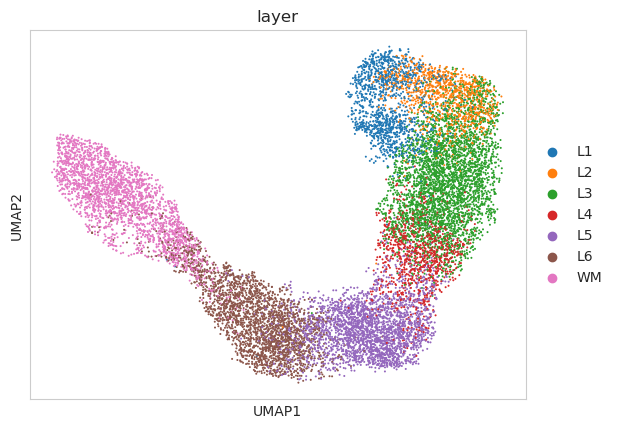

In [13]:
import scanpy as sc
adata_all.obsm['latent'] = np.array(latent.values)
sc.pp.neighbors(adata_all, use_rep='latent', n_neighbors=30)
sc.tl.umap(adata_all)
sc.pl.umap(adata_all, color="layer", color_map="rainbow")

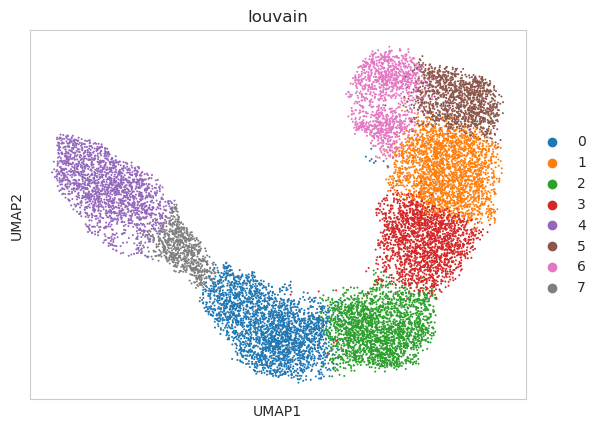

In [21]:
sc.tl.louvain(adata_all, resolution=0.65)
# colours = ['#8c564b', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd', '#1f77b4', '#e377c2', '#7f7f7f', '#bcbd22', '#d62728', '#aec7e8']
sc.pl.umap(adata_all, color="louvain")

In [23]:
# Same graph with labels
# Import dependencies
import plotly
import plotly.graph_objects as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
# Labels by cluster with 5 colors
# Assign colors to each cluster
cluster_colors =  ['#8c564b', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd', '#1f77b4', '#e377c2', '#7f7f7f', '#bcbd22', '#d62728', '#aec7e8', '#ffbb78', '#98df8a', '#9edae5']
cluster_labels = [int(i) for i in adata_all.obs['louvain'].unique()]
cluster_label_to_color = {"cluster "+ str(cluster_labels[i]+1): cluster_colors[i] for i in range(len(cluster_labels))}

plot_data = {
    f"cluster {i+1}": {'x': df_3d_coor['x'][adata_all.obs['louvain'] == str(i)].values,
                       'y': df_3d_coor['y'][adata_all.obs['louvain'] == str(i)].values,
                       'z': df_3d_coor['z'][adata_all.obs['louvain'] == str(i)].values
                       } for i in range(len(cluster_labels))
}
data = []
for label, coords in plot_data.items():
    data.append(
        go.Scatter3d(
            x=coords['x'],
            y=coords['y'],
            z=coords['z'],
            mode='markers',
            marker=dict(size=6, color=cluster_label_to_color[label], opacity=0.8),
            name=label
        )
    )
# Render the plot.
# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
)
plot_figure = go.Figure(data=data, layout=layout)
plotly.offline.iplot(plot_figure)

## Original paper's UMAP

In [24]:
import umap

reducer = umap.UMAP(n_neighbors=30,
                    n_components=2,
                    metric="correlation",
                    n_epochs=None,
                    learning_rate=1.0,
                    min_dist=0.3,
                    spread=1.0,
                    set_op_mix_ratio=1.0,
                    local_connectivity=1,
                    repulsion_strength=1,
                    negative_sample_rate=5,
                    a=None,
                    b=None,
                    random_state=1234,
                    metric_kwds=None,
                    angular_rp_forest=False,
                    verbose=True)

embedding = reducer.fit_transform(adata_all.obsm['latent'])

n_spots = embedding.shape[0]
size = 120000 / n_spots

UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation',
     min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1,
     verbose=True)
Construct fuzzy simplicial set
Thu Nov 30 10:42:53 2023 Finding Nearest Neighbors
Thu Nov 30 10:42:53 2023 Building RP forest with 11 trees
Thu Nov 30 10:42:54 2023 NN descent for 14 iterations
	 0  /  14
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
Thu Nov 30 10:43:05 2023 Finished Nearest Neighbor Search
Thu Nov 30 10:43:05 2023 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 30 10:43:17 2023 Finished embedding


KeyError: 'Cluster'

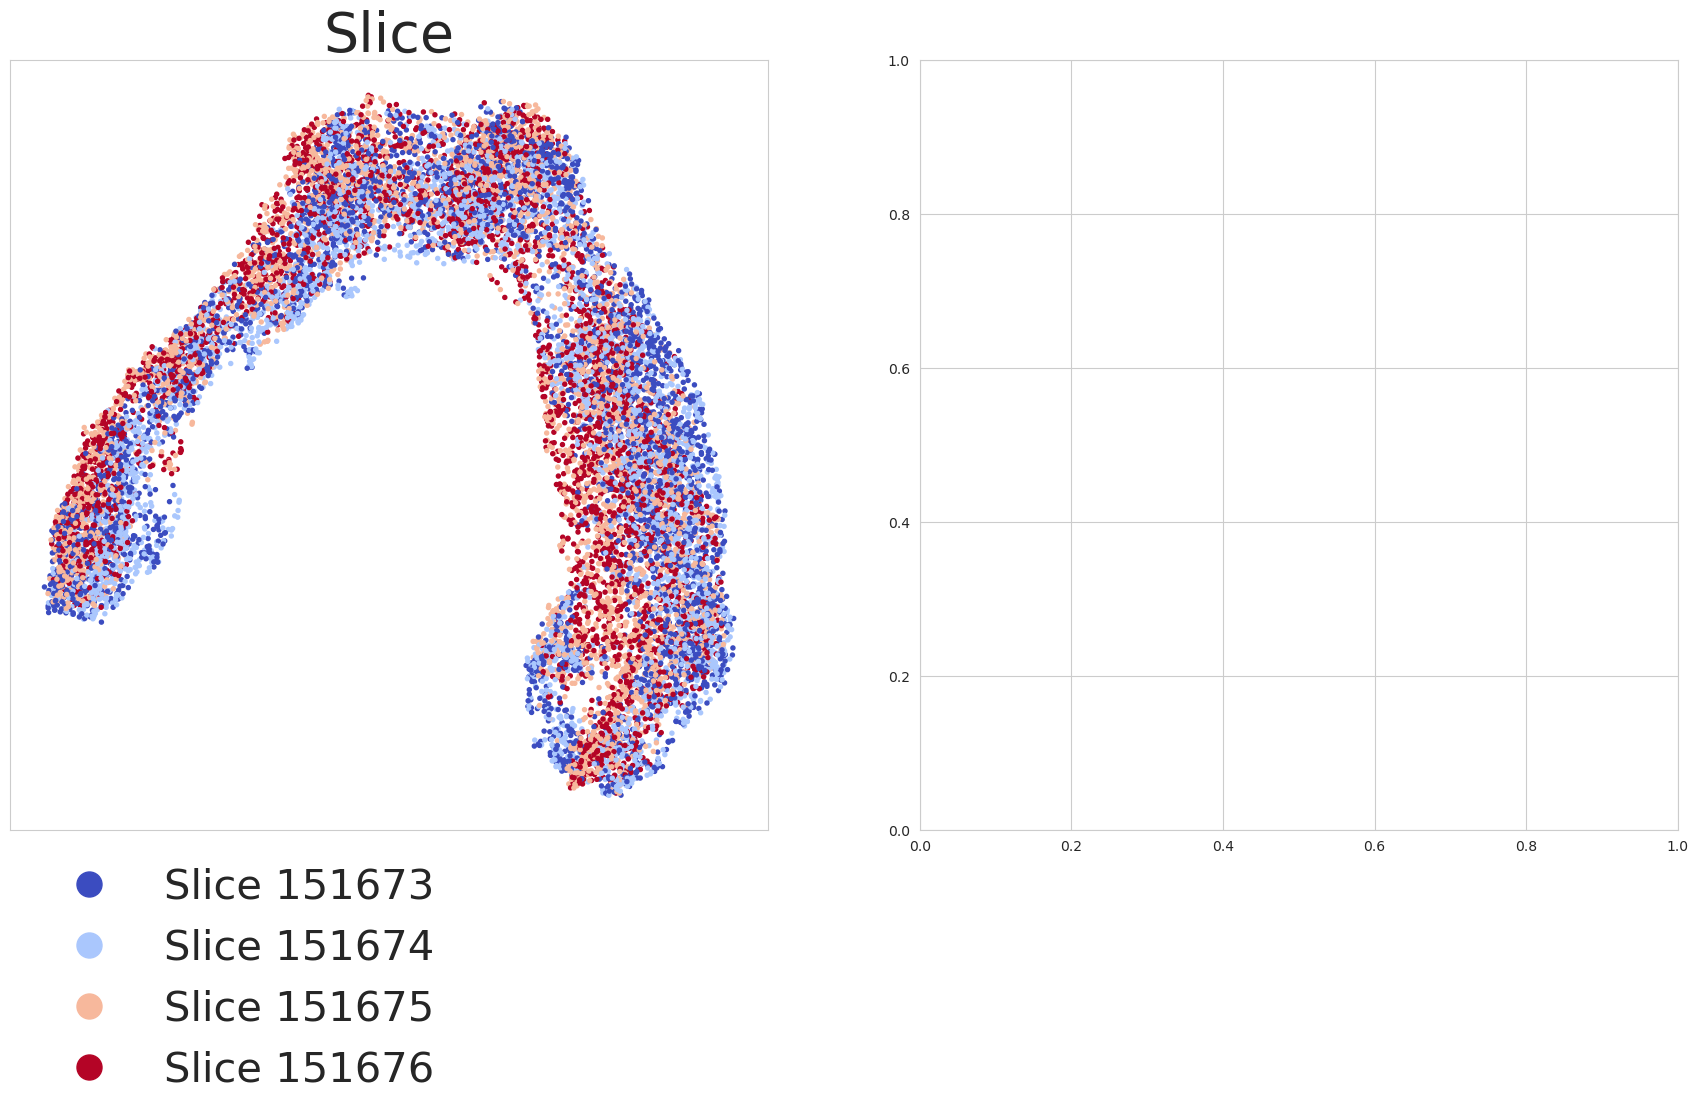

In [25]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

le_slice = preprocessing.LabelEncoder()
label_slice = le_slice.fit_transform(adata_all.obs['slice_id'])

le_layer = preprocessing.LabelEncoder()
label_layer = le_layer.fit_transform(adata_all.obs['layer'])

np.random.seed(1234)
order = np.arange(n_spots)
np.random.shuffle(order)

f = plt.figure(figsize=(45,10))

ax1 = f.add_subplot(1,4,1)
scatter1 = ax1.scatter(embedding[order, 0], embedding[order, 1],
                       s=size, c=label_slice[order], cmap='coolwarm')
ax1.set_title("Slice", fontsize=40)
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)

slice_idx = [151673, 151674, 151675, 151676]

l1 = ax1.legend(handles=scatter1.legend_elements()[0],
                labels=["Slice %d" % i for i in slice_idx],
                loc="upper left", bbox_to_anchor=(0., 0.),
                markerscale=3., title_fontsize=45, fontsize=30, frameon=False, ncol=1)
l1._legend_box.align = "left"


ax2 = f.add_subplot(1,4,2)
scatter2 = ax2.scatter(embedding[order, 0], embedding[order, 1],
                       s=size, c=adata_all.obs['Cluster'][order], cmap='cividis')
ax2.set_title("Cluster", fontsize=40)
ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)

l2 = ax2.legend(handles=scatter2.legend_elements()[0],
                labels=["Cluster %d" % i for i in range(1, 8)],
                loc="upper left", bbox_to_anchor=(0., 0.),
                markerscale=3., title_fontsize=45, fontsize=30, frameon=False, ncol=2)

l2._legend_box.align = "left"
ax3 = f.add_subplot(1,4,3)
scatter3 = ax3.scatter(embedding[order, 0], embedding[order, 1],
                       s=size, c=label_layer[order], cmap=ListedColormap(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"]))
ax3.set_title("Layer annotation", fontsize=40)
ax3.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)

l3 = ax3.legend(handles=scatter3.legend_elements()[0],
                labels=sorted(set(adata_all.obs['layer'].values)),
                loc="upper left", bbox_to_anchor=(0., 0.),
                markerscale=3., title_fontsize=45, fontsize=30, frameon=False, ncol=2)

l3._legend_box.align = "left"

ax4 = f.add_subplot(1,4,4)
ax4.set_title("Trajectory", fontsize=40)
ax4.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax4.set_xlim(ax3.get_xlim())
ax4.set_ylim(ax3.get_ylim())

pos = []
for layer in ["L1", "L2", "L3", "L4", "L5", "L6", "WM"]:
    center = np.mean(embedding[adata_all.obs['layer'].values.astype(str)==layer, :], axis=0)
    pos.append(center)

sc.pl.paga(adata_all, pos=np.array(pos), node_size_scale=20, edge_width_scale=5, fontsize=20, fontoutline=3, ax=ax4)

f.subplots_adjust(hspace=.1, wspace=.1)
plt.show()

In [26]:
adata_all

AnnData object with n_obs × n_vars = 14243 × 4558
    obs: 'in_tissue', 'array_row', 'array_col', 'barcode', 'slice_id', 'layer', 'slice', 'batch', 'library_size', 'louvain'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'log1p', 'neighbors', 'louvain', 'umap', 'layer_colors', 'louvain_colors'
    obsm: 'spatial', 'spatial_aligned', 'count', 'graph', '3D_coor', 'latent', 'X_umap'
    obsp: 'distances', 'connectivities'